<a href="https://colab.research.google.com/github/ah1997/Stochastic/blob/Sandpile/statisticalestimation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applied Markov processes | Statistical or Monte Carlo estimation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Point estimator

We want to estimate the mean $E[R]$ of a sample of values known to be distributed from the Rayleigh distribution
$$
p(r) = r e^{-r^2/2}.
$$
For this, we generate a sample of $L$ values and calculate the estimator
$$
\hat\mu_L=\frac{1}{L}\sum_{i=1}^L X_i.
$$
By increasing $L$, the estimator should get closer to the theoretical expectation, which is known to be
$$
E[R] = \int_0^\infty r\, p(r)\, dr = \sqrt{\frac{\pi}{2}}.
$$

In [ ]:
L = 10**6
sample = np.random.rayleigh(1, L)  # Using the built-in Rayleigh generator
mean_est = np.mean(sample)
print('Estimator value = ', mean_est)
print('Theoretical value = ', np.sqrt(np.pi/2))

Estimator value =  1.2542640266691212
Theoretical value =  1.2533141373155001


## Gaussian error bars

From the sample used to obtain the mean estimate, we can also calculate the Gaussian error, as shown in the lecture notes.

In [ ]:
L = 10**6
sample = np.random.rayleigh(1, L)  # Using the built-in Rayleigh generator
mean_est = np.mean(sample)
mean_est_err = np.std(sample)/np.sqrt(L)
print('Estimator value = ', mean_est, "±", mean_est_err)
print('Absolute error = ', np.abs(mean_est-np.sqrt(np.pi/2)))

Estimator value =  1.2531675787693715 ± 0.000655081963565938
Absolute error =  0.00014655854612866115


## Convergence analysis

An estimation should be repeated for increasing values of $L$ to show that it converges. The code next does this efficiently without recalculating the estimator and its error for each $L$.

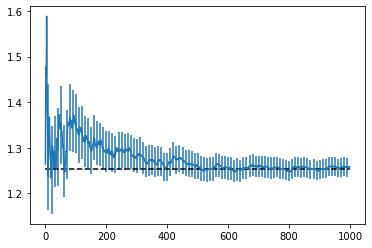

In [ ]:
Lmax = 10**3

# Empty lists to receive results
mean_est_list = np.zeros(Lmax)
mean_est_err_list = np.zeros(Lmax)

# Initial values of sums
s = 0.0
v = 0.0

for i in range(Lmax):
    r = np.random.rayleigh(1)
    s += r     # Accumulate the RVs in sum to get mean estimator
    v += r**2  # Accumulate the RVs^2 to get the error bar

    mean_est = s/(i+1.0)     # Mean estimator
    sec_mom_est = v/(i+1.0)  # Second moment estimator
    mean_est_err = np.sqrt(sec_mom_est-mean_est**2) / np.sqrt(i+1.0)  # Estimator standard deviation

    # Put results in lists
    mean_est_list[i] = mean_est
    mean_est_err_list[i] = mean_est_err

# Plot estimator with error bar
plt.errorbar(range(Lmax), mean_est_list, mean_est_err_list, errorevery=10)

# Show theoretical value
plt.plot(range(Lmax), np.zeros(Lmax)+np.sqrt(np.pi/2), 'k--')
plt.show()

Alternatively, we can show the error as a filled plot:

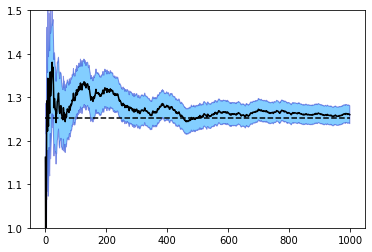

In [ ]:
Lmax = 10**3
mean_est_list = np.zeros(Lmax)
mean_est_err_list = np.zeros(Lmax)

s = 0.0
v = 0.0

for i in range(Lmax):
    r = np.random.rayleigh(1)
    s += r
    v += r**2

    mean_est = s/(i+1.0)
    sec_mom_est = v/(i+1.0)
    mean_est_err = np.sqrt(sec_mom_est-mean_est**2)/np.sqrt(i+1.0)

    mean_est_list[i] = mean_est
    mean_est_err_list[i] = mean_est_err

plt.plot(range(Lmax), mean_est_list, 'k-')
plt.fill_between(range(Lmax), mean_est_list-mean_est_err_list, mean_est_list +
                 mean_est_err_list, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.plot(range(Lmax), np.zeros(Lmax)+np.sqrt(np.pi/2), 'k--')
plt.ylim([1.0, 1.5])
plt.show()